# Data Dictionary

* hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel).
* is_canceled: Value indicating if the booking was canceled (1) or not (0).
* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
* arrival_date_year: Year of arrival date.
* arrival_date_month: Month of arrival date.
* arrival_date_week_number: Week number of year for arrival date.
* arrival_date_day_of_month: Day of arrival date.
* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
* adults: Number of adults.
* children: Number of children.
* babies: Number of babies.
* meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB   – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and      dinner).
* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
* market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0).
* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.
* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking.
* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* agent: ID of the travel agency that made the booking.
* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.
* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
* required_car_parking_spaces: Number of car parking spaces required by the customer.
* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor).
* reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when the booking was canceled or when the customer checked-out of the hotel.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [2]:
dataset = pd.read_csv('hotel.csv')

## Understanding Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
len(dataset)

119390

In [5]:
dataset.shape

(119390, 32)

In [6]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
len(dataset.columns)

32

In [8]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Summary statistics
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# Corelation matrix
dataset.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


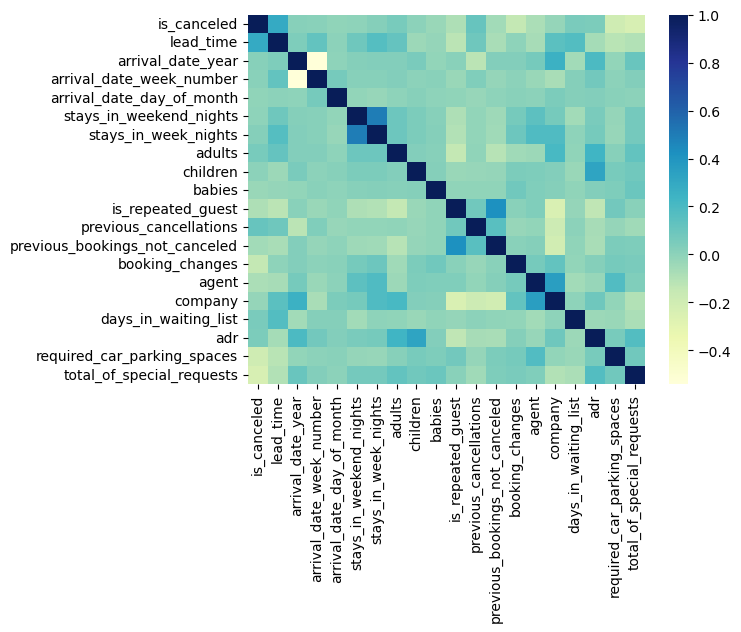

In [11]:
# heatmap for the corelation matrix

sns.heatmap(dataset.corr(),cmap='YlGnBu')

plt.show()

## Missing Value Treatment

In [12]:
# Checking for missing values

dataset.isnull().sum()[dataset.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [13]:
# Checking for class imbalance in the target variable

dataset.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

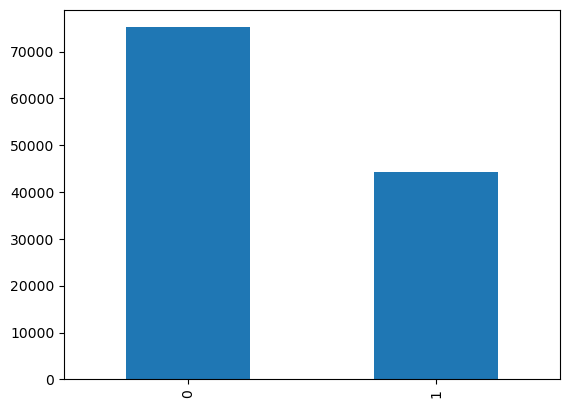

In [14]:
dataset.is_canceled.value_counts().plot.bar()

plt.show()

## Data cleaning and Handling of missing Values


In [15]:
#Cheking columns which have missing values

dataset.isnull().sum()[dataset.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [16]:
# Now we will fill the agent column
# We will fill the missing values with 'No Agent' and the agent ids with 'Agent' 

# First we will fill the agent ids with 'Agent'
dataset.loc[dataset.agent.isnull()==False,'agent']='Agent'

In [17]:
# Now we will fill the null values with 'No agent'

dataset.agent.fillna('No agent',inplace=True)

In [18]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

children         4
country        488
company     112593
dtype: int64

In [19]:
# We would fill the missing values in the country coulumns with 'Unknown' 
# Since we do not know the country name

dataset.country.fillna('Unknown',inplace=True)

In [20]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

children         4
company     112593
dtype: int64

In [21]:
# We see that in some rows market segment or distribution channel is given as corporate where the company row is null
# We will fill these null values with 'Company'

dataset.loc[((dataset.market_segment=='Corporate') | (dataset.distribution_channel=='Corporate')) & 
            (dataset.company.isnull()),'company']='Corporate'

In [22]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

children         4
company     110912
dtype: int64

In [23]:
# Now we will fill the non missing values in company column with corporate as well

dataset.loc[dataset.company.isnull()==False,'company']='Corporate'

In [24]:
# Now we will fill the remaining missing values in the company column with 'Individuals'

dataset.company.fillna('Individuals',inplace=True)

In [25]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

children    4
dtype: int64

In [26]:
# We would fill the missing values in the children column with 0

dataset.children.fillna(0,inplace=True)

In [27]:
# The data has no missing values now

dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [28]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

Series([], dtype: int64)

In [29]:
# Removing Duplicated rows

dataset=dataset.drop_duplicates(keep='first').reset_index().drop(columns='index')

In [30]:
# Before doing our univariate analysis we would change the datatypes of columns to their correct datatype

dataset.arrival_date_year=dataset.arrival_date_year.astype(object)

In [31]:
# Also there are a lot of unique values in the country column
# so renaming this country names to their respective continents

dataset.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [32]:
# We would bin the country column in its respective continents

europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

unk=['Unknown']

In [33]:
#Binning the country column

def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'
    elif x in Others:
        return 'Others'
    elif x in unk:
        return 'Unknown'
    
dataset.country=dataset.country.apply(country_bin)

In [34]:
dataset.country.unique()

array(['Europe', 'North America', 'Unknown', 'Asia', 'South America',
       'Australia', 'Africa', 'Others'], dtype=object)

In [35]:
## Dropping unuseful columns

# We observed that out of all the features we have one insignificant feature namely, days in waiting list
# So we would drop this variable from our model bulding
dataset.drop(columns='days_in_waiting_list',inplace=True)

# We also have two post-event columns, reservation_status and reservation_status_date
# To make a robust model we would have to drop these two columns as well
dataset.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

In [36]:
## Combing similar columns into one new name column

# Creating a new feature total_stay
dataset['total_stay'] = dataset.stays_in_week_nights + dataset.stays_in_weekend_nights
dataset.drop(columns = ['stays_in_week_nights','stays_in_weekend_nights'], inplace=True)

# Creating a new column party_size
dataset['party_size'] = dataset.adults + dataset.children + dataset.babies
dataset.drop(columns = ['adults','children','babies'], inplace=True)

In [37]:
dataset['is_canceled'] = dataset['is_canceled'].astype('object')

In [38]:
dataset = dataset.drop('arrival_date_year', axis=1)
dataset = dataset.drop('arrival_date_month', axis=1)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87379 entries, 0 to 87378
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87379 non-null  object 
 1   is_canceled                     87379 non-null  object 
 2   lead_time                       87379 non-null  int64  
 3   arrival_date_week_number        87379 non-null  int64  
 4   arrival_date_day_of_month       87379 non-null  int64  
 5   meal                            87379 non-null  object 
 6   country                         87379 non-null  object 
 7   market_segment                  87379 non-null  object 
 8   distribution_channel            87379 non-null  object 
 9   is_repeated_guest               87379 non-null  int64  
 10  previous_cancellations          87379 non-null  int64  
 11  previous_bookings_not_canceled  87379 non-null  int64  
 12  reserved_room_type              

In [40]:
dataset

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,party_size
0,Resort Hotel,0,342,27,1,BB,Europe,Direct,Direct,0,...,3,No Deposit,No agent,Individuals,Transient,0.00,0,0,0,2.0
1,Resort Hotel,0,737,27,1,BB,Europe,Direct,Direct,0,...,4,No Deposit,No agent,Individuals,Transient,0.00,0,0,0,2.0
2,Resort Hotel,0,7,27,1,BB,Europe,Direct,Direct,0,...,0,No Deposit,No agent,Individuals,Transient,75.00,0,0,1,1.0
3,Resort Hotel,0,13,27,1,BB,Europe,Corporate,Corporate,0,...,0,No Deposit,Agent,Corporate,Transient,75.00,0,0,1,1.0
4,Resort Hotel,0,14,27,1,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,98.00,0,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,City Hotel,0,23,35,30,BB,Europe,Offline TA/TO,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,96.14,0,0,7,2.0
87375,City Hotel,0,102,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,225.43,0,2,7,3.0
87376,City Hotel,0,34,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,157.71,0,4,7,2.0
87377,City Hotel,0,109,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,104.40,0,0,7,2.0


In [41]:
dataset.shape

(87379, 24)

## Exploratory Data Analysis


In [43]:
import sweetviz as sv

In [45]:
dataset['is_canceled'] = dataset['is_canceled'].astype('int64')

In [46]:
report = sv.analyze(dataset, target_feat="is_canceled")

                                             |                                             | [  0%]   00:00 ->…


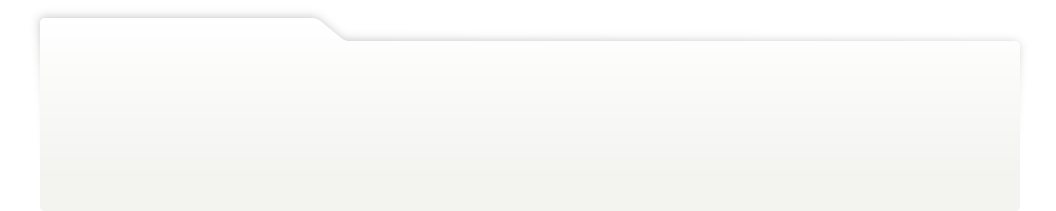
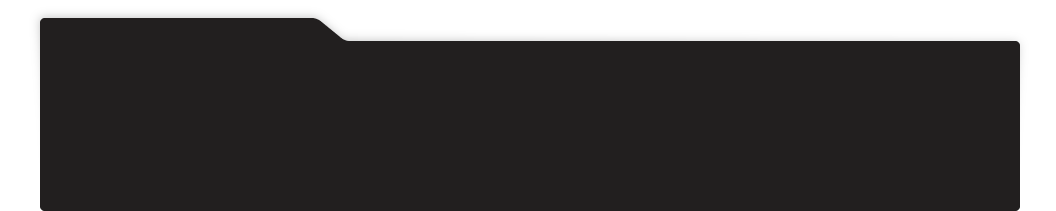
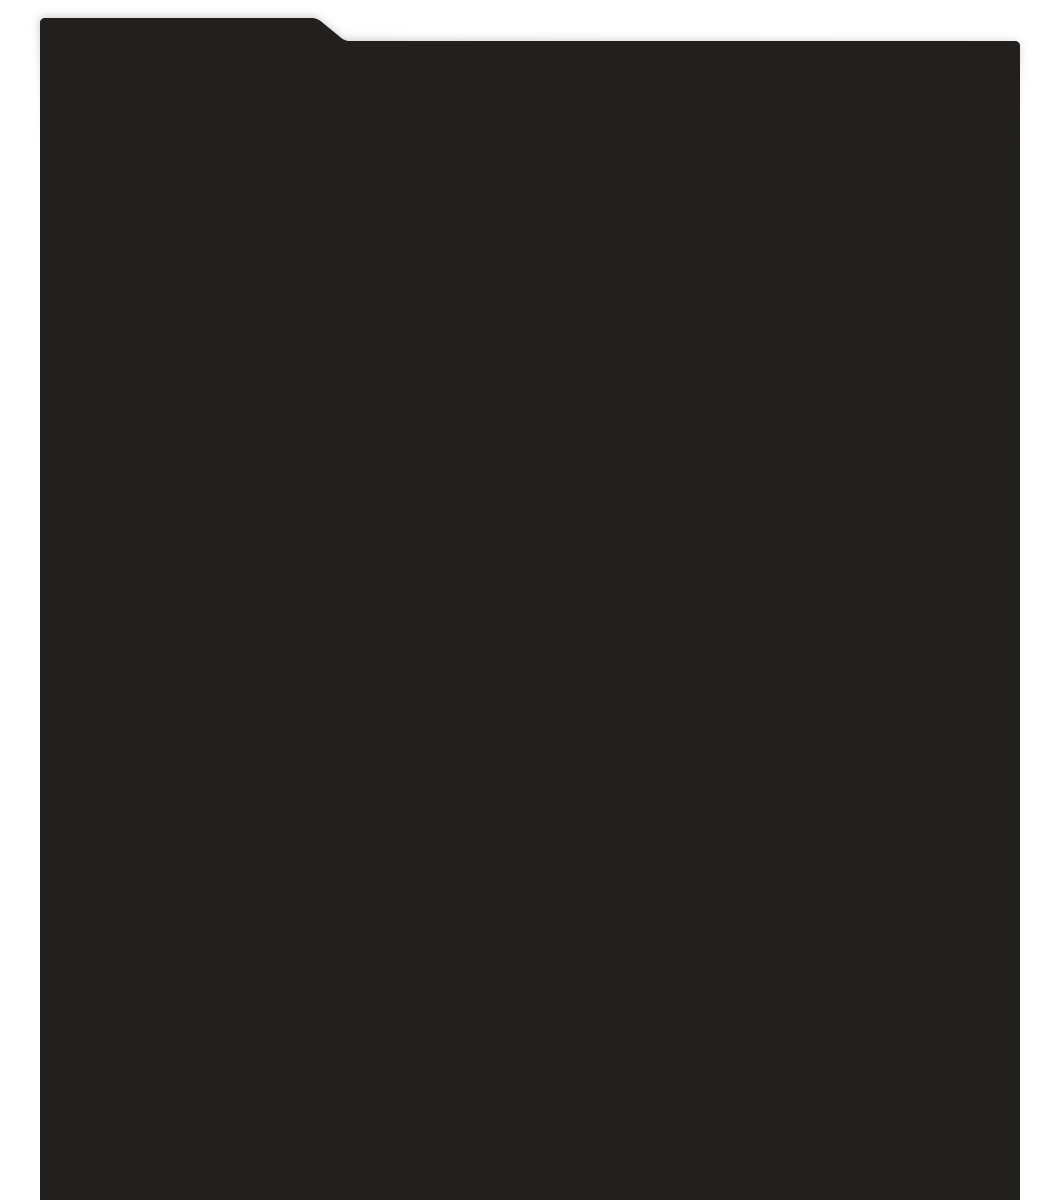
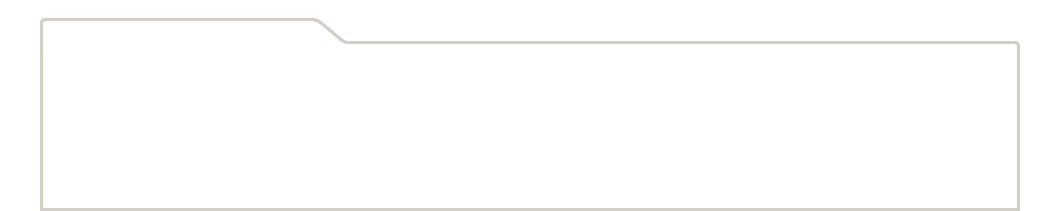
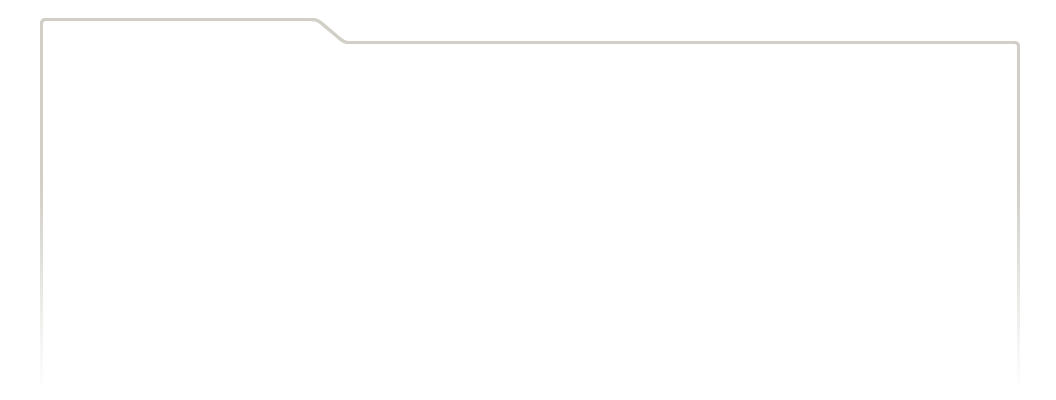
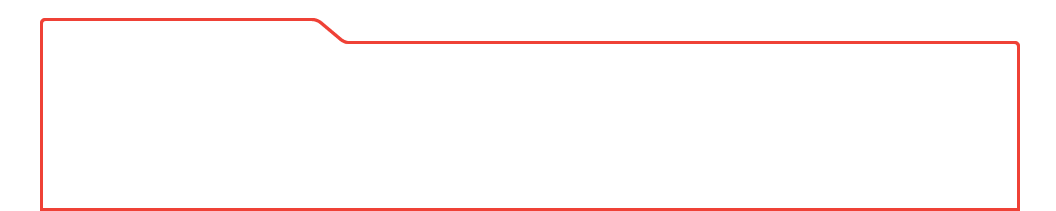
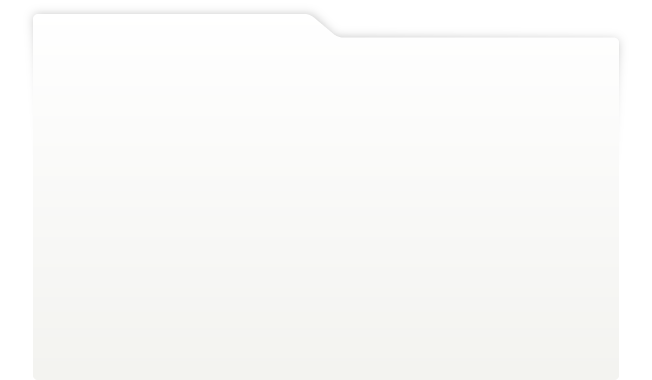
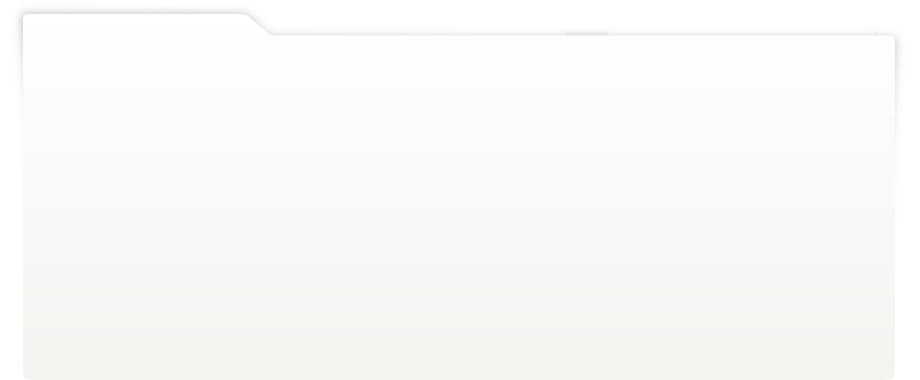
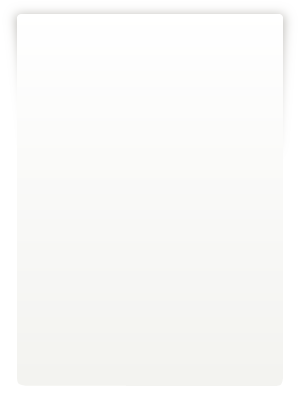
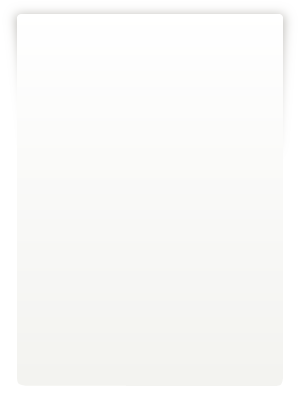
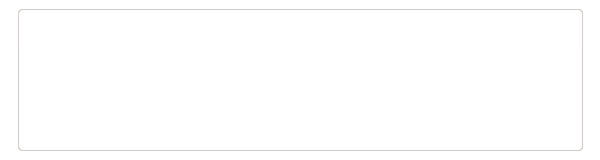
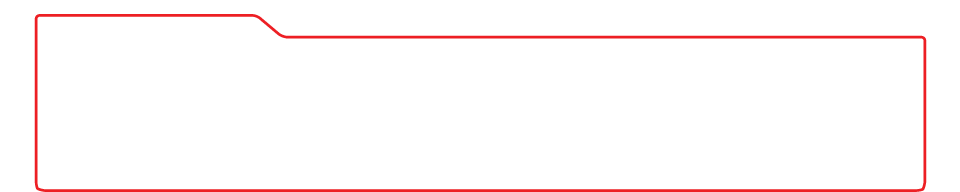
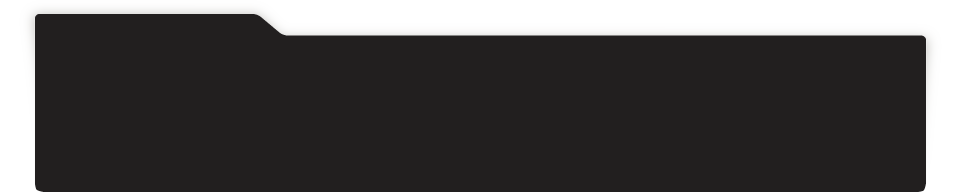
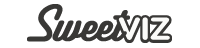
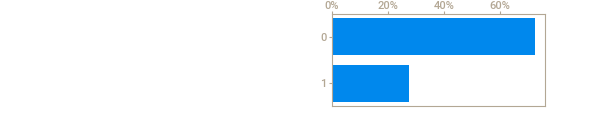
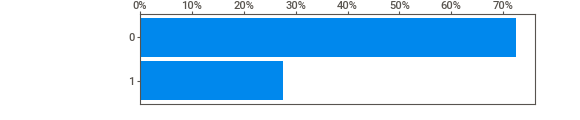
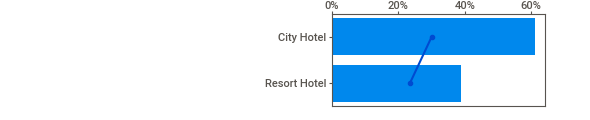
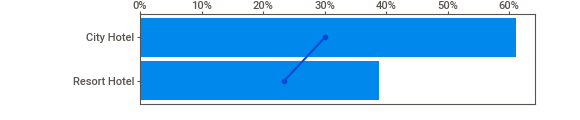
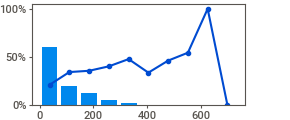
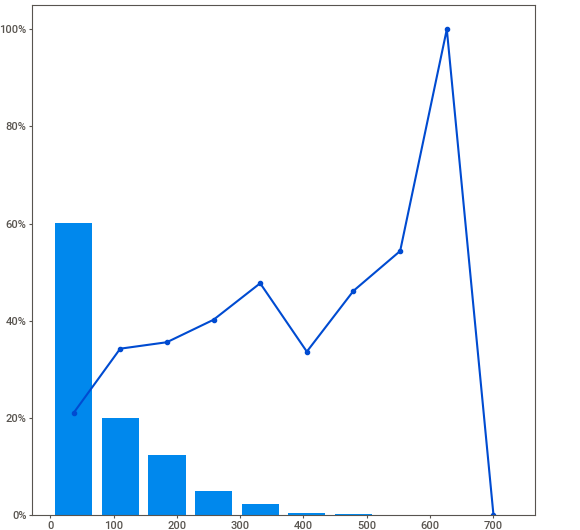
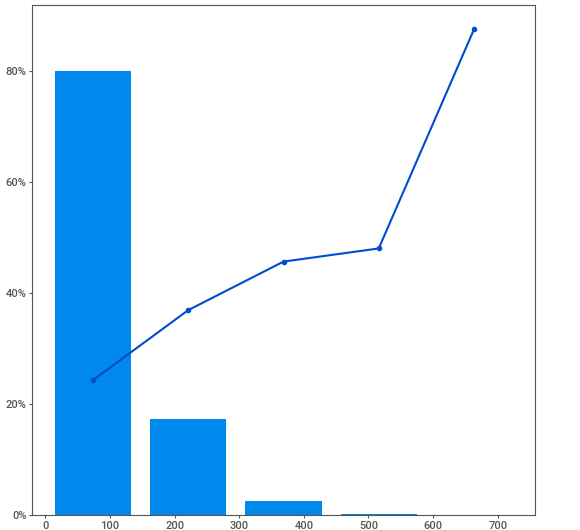
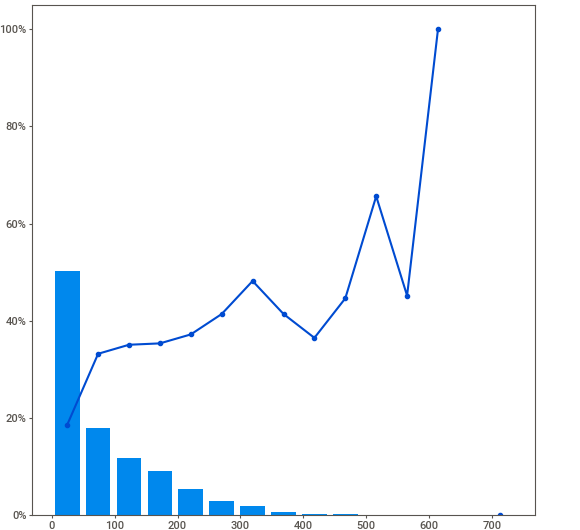
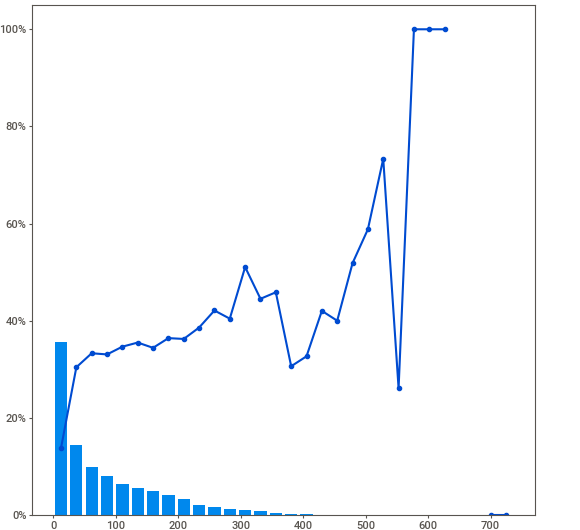
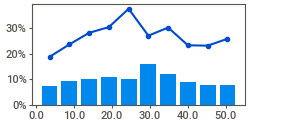
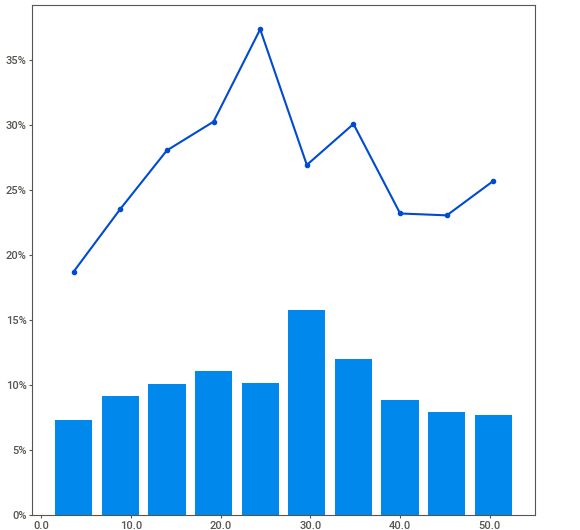
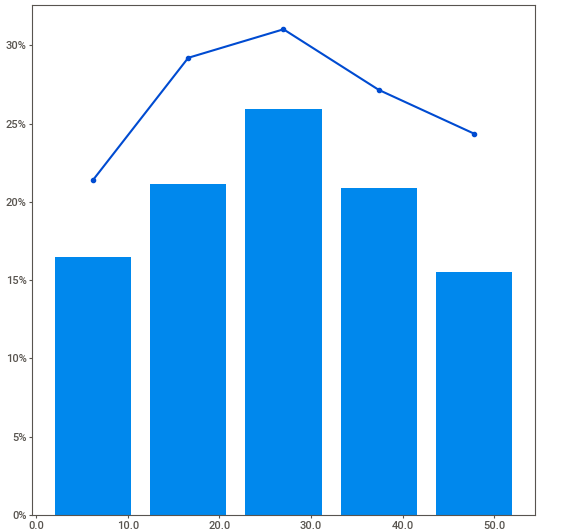
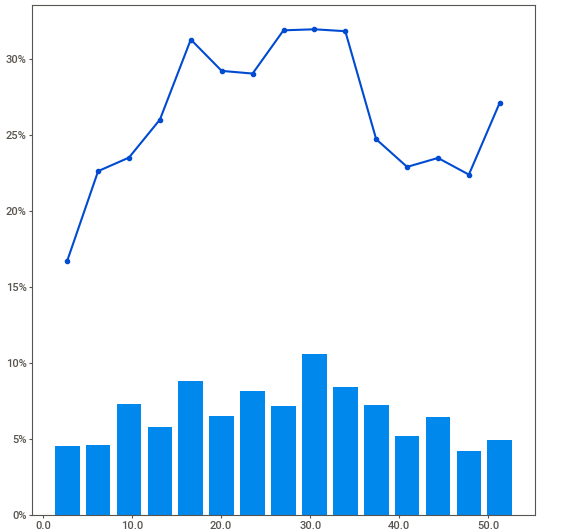
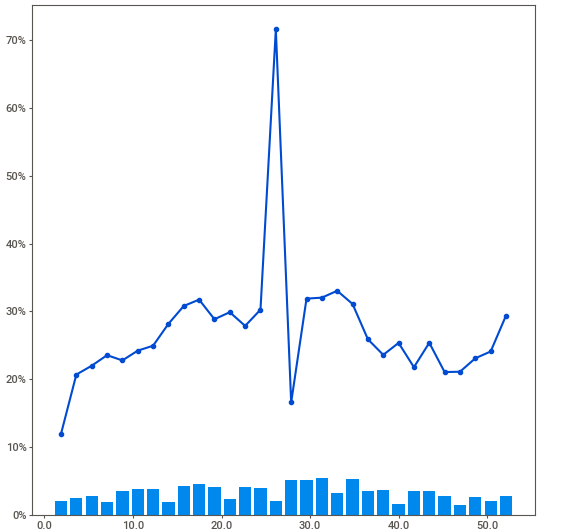
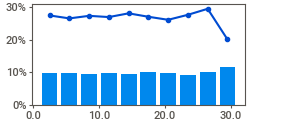
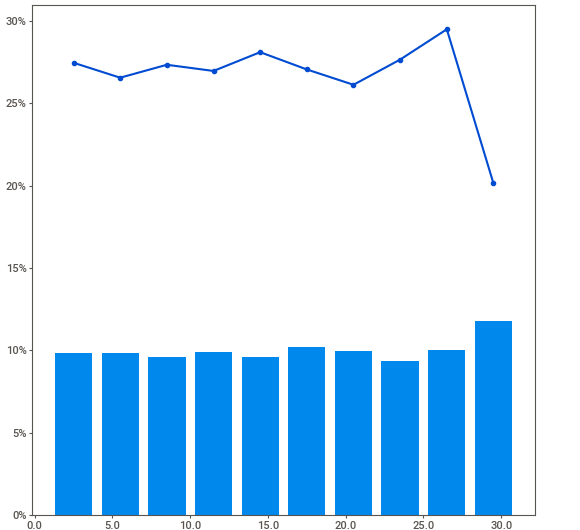
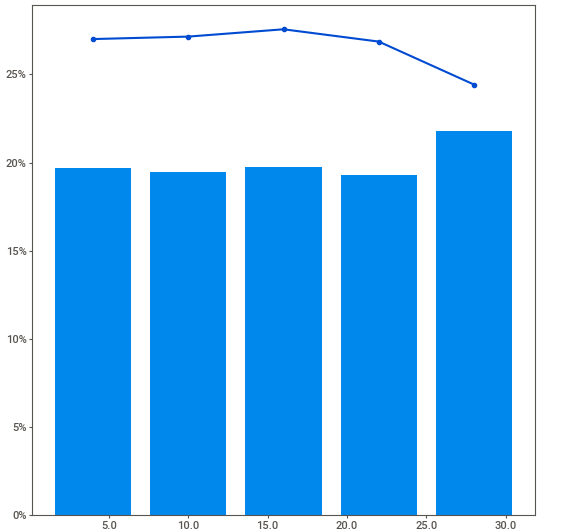
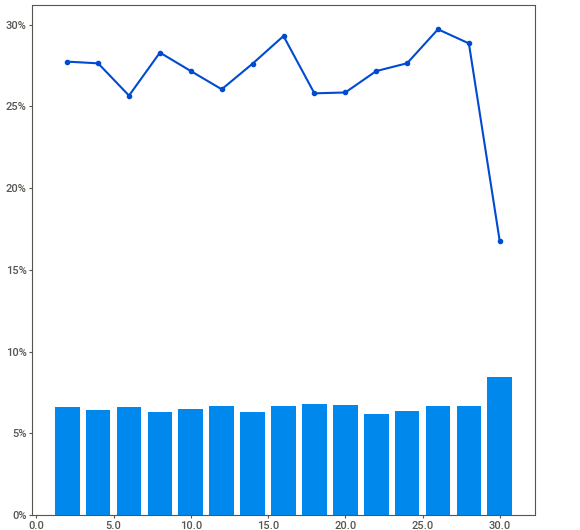
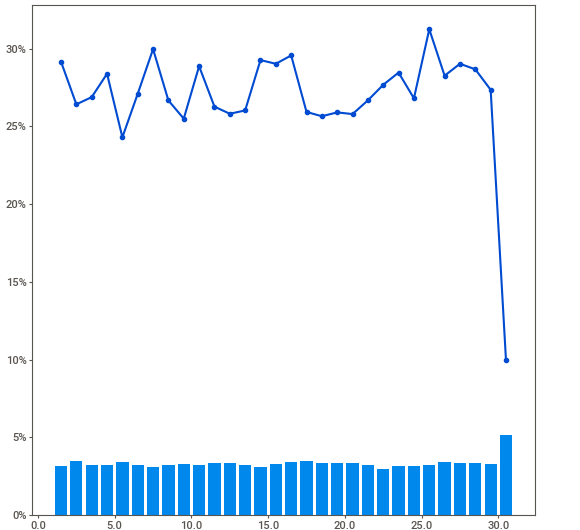
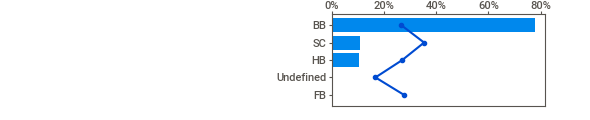
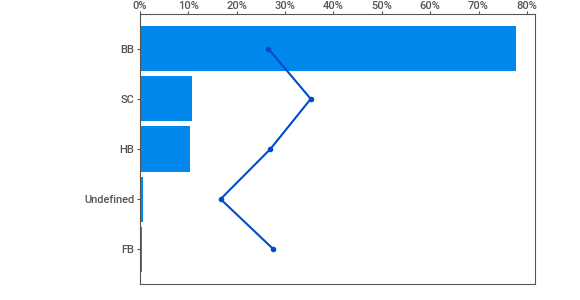
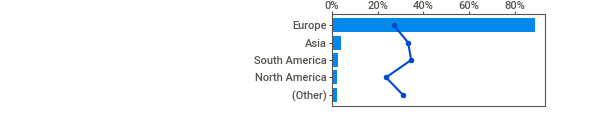
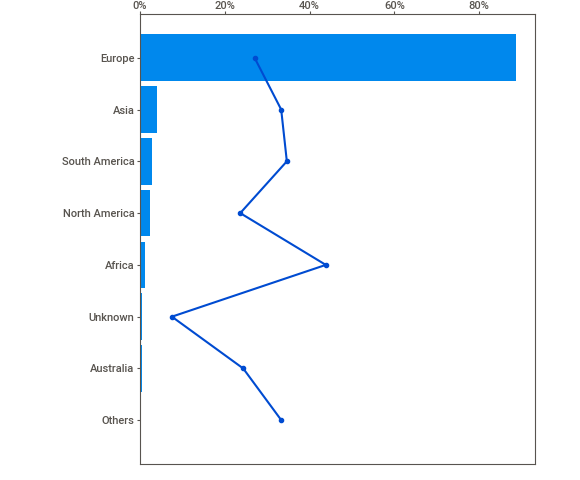
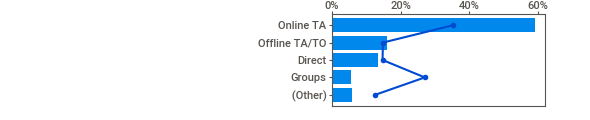
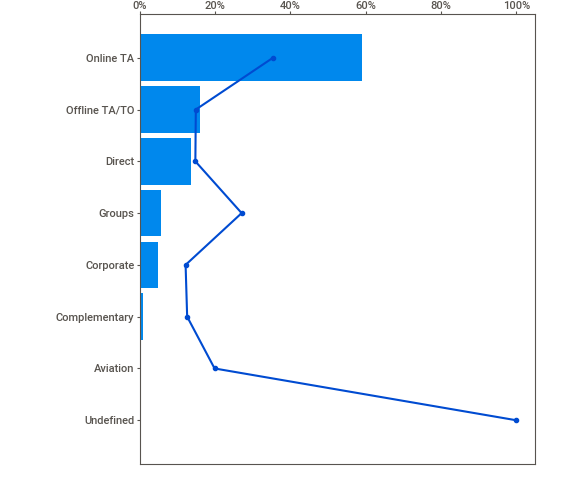
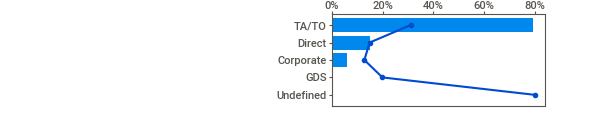
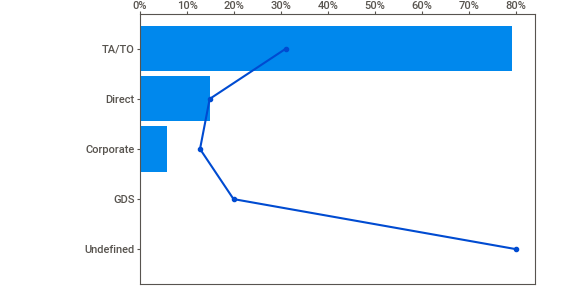
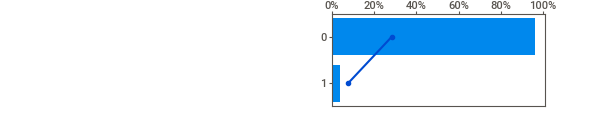
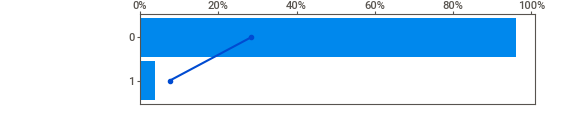
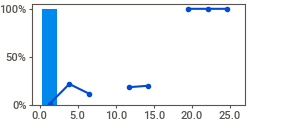
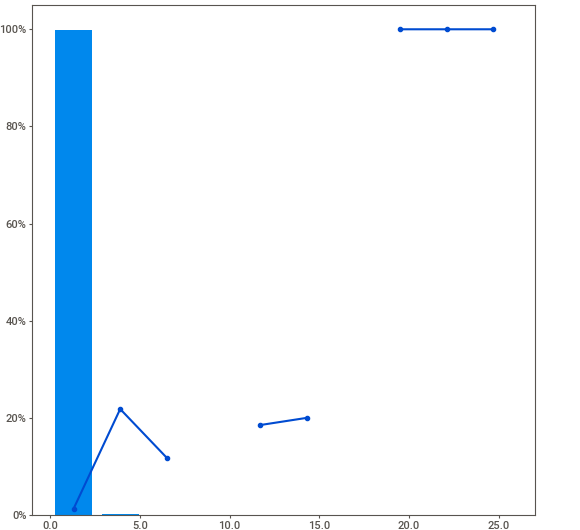
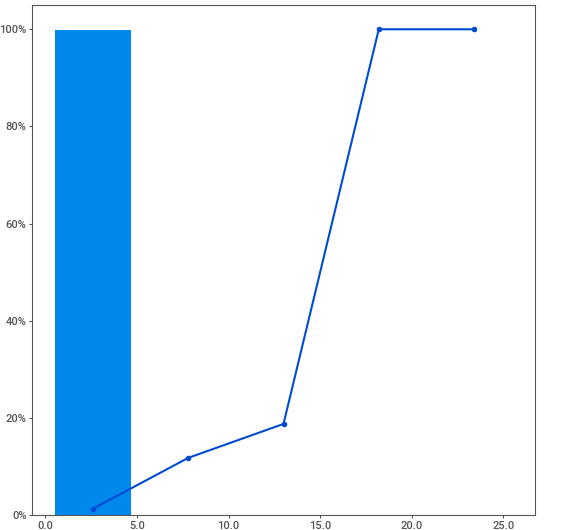
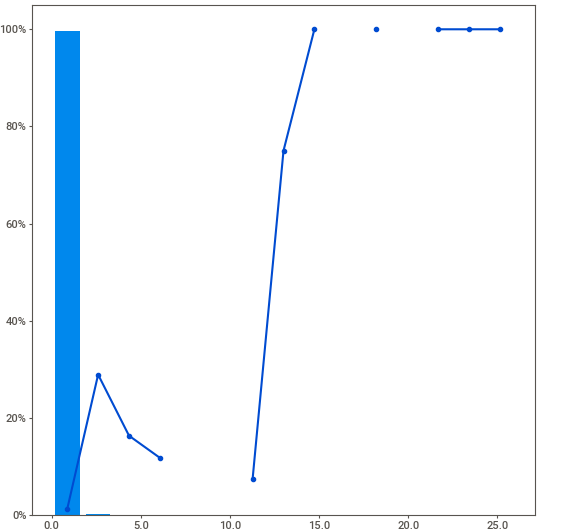
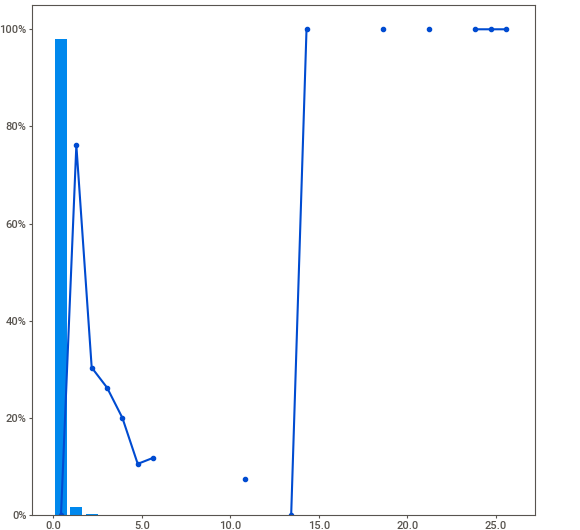
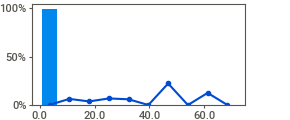
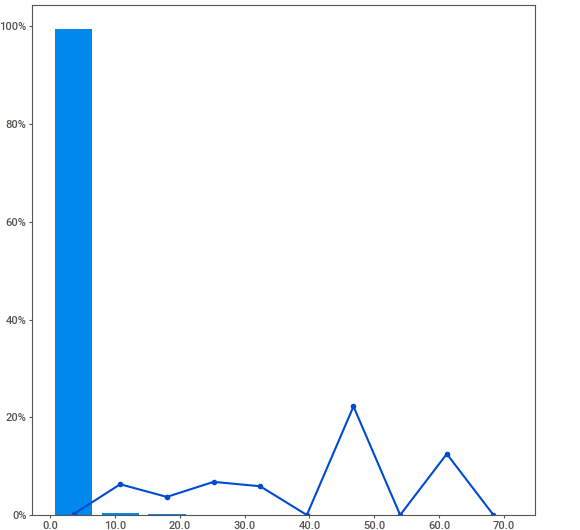
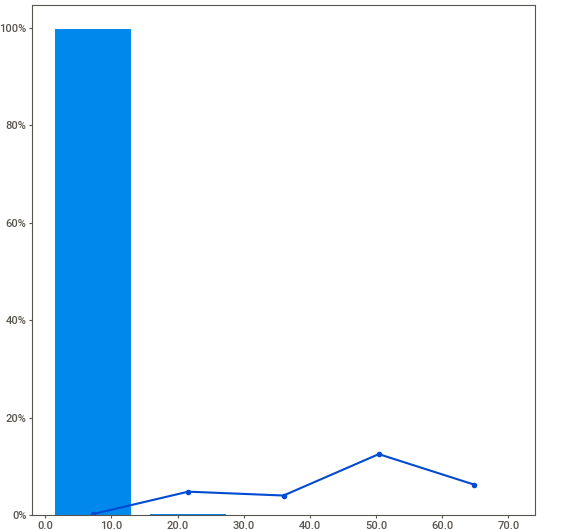
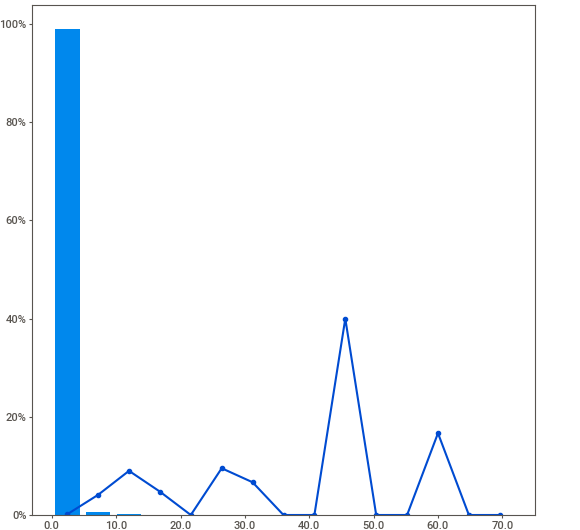
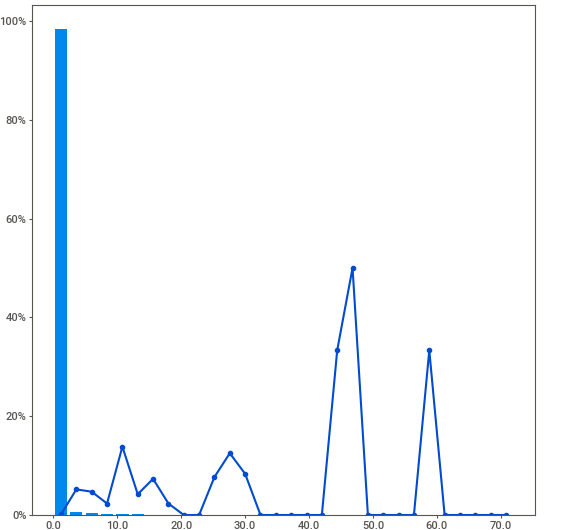
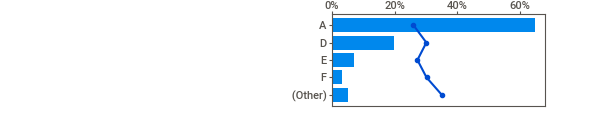
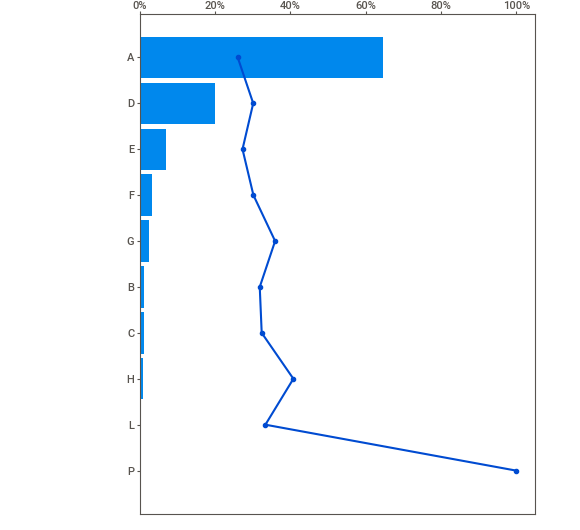
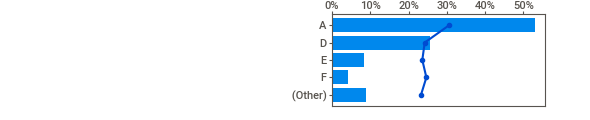
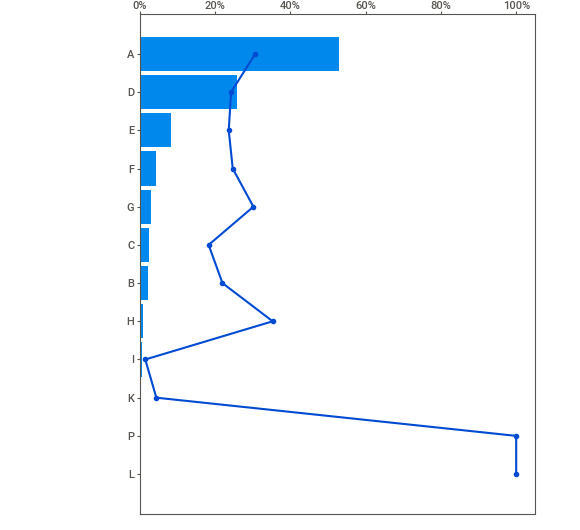
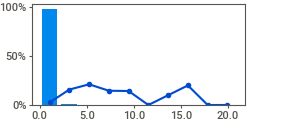
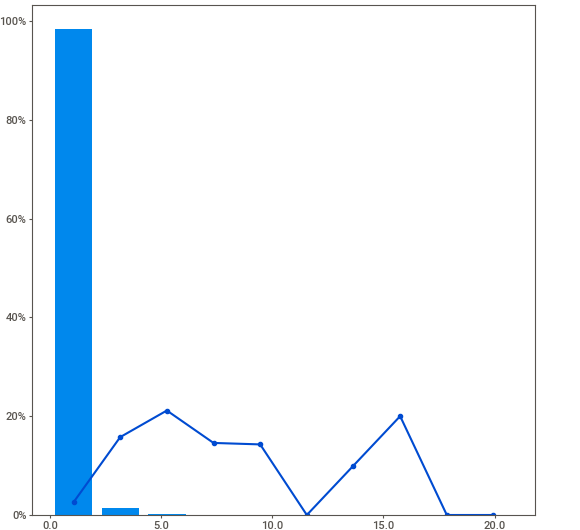
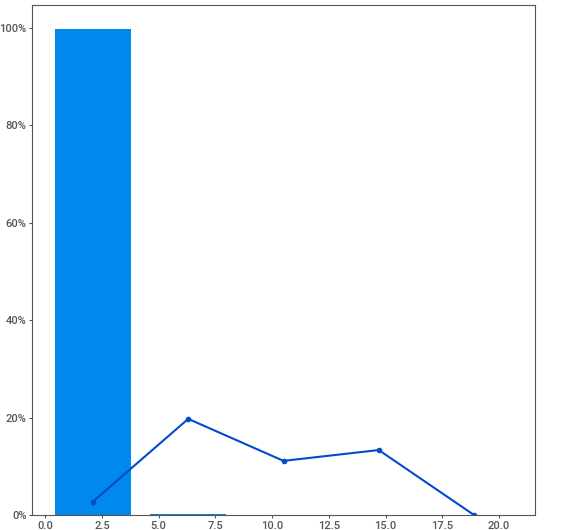
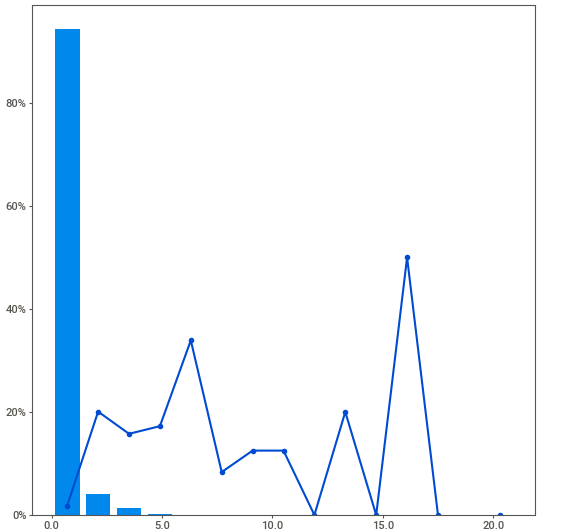
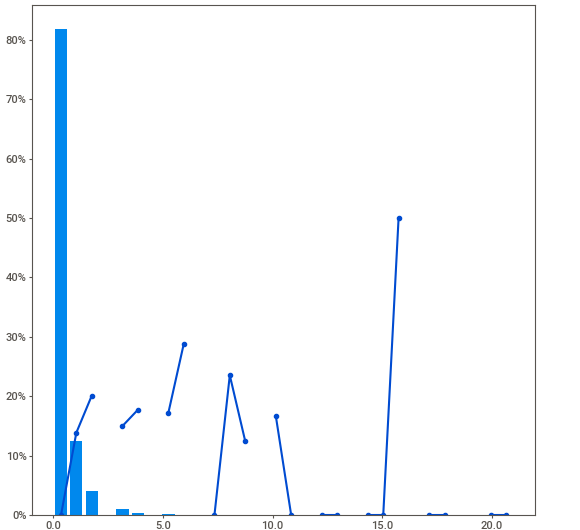
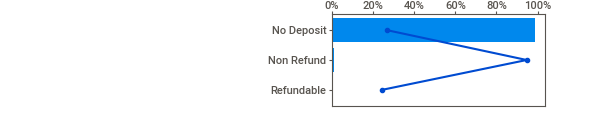
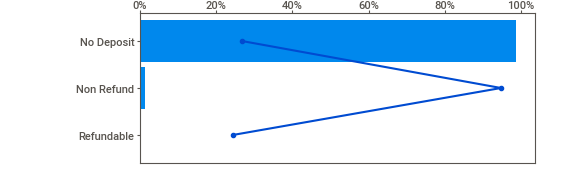
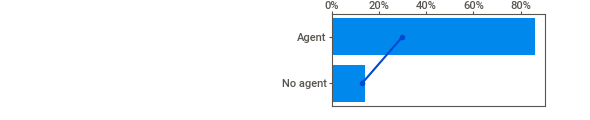
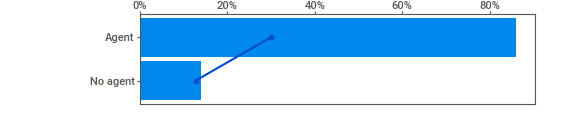
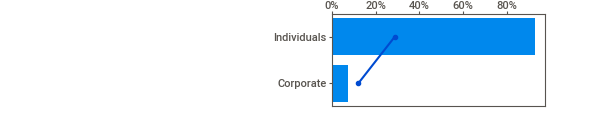
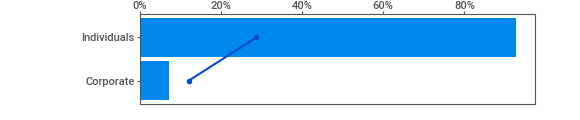
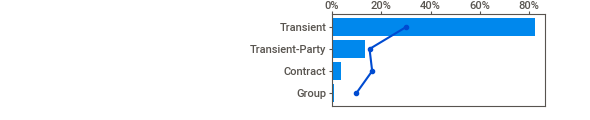
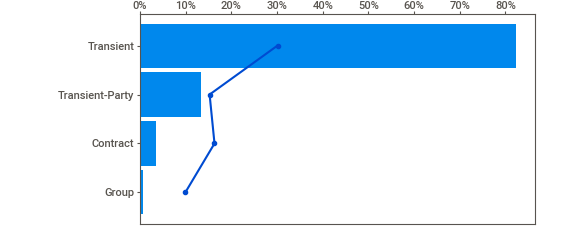
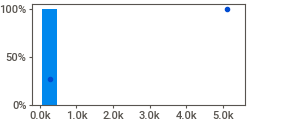
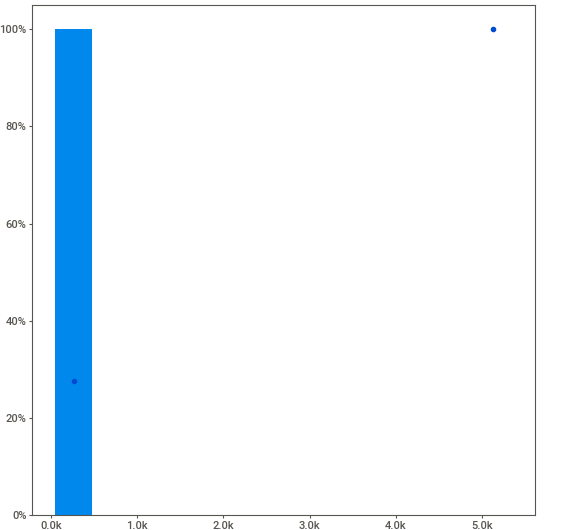
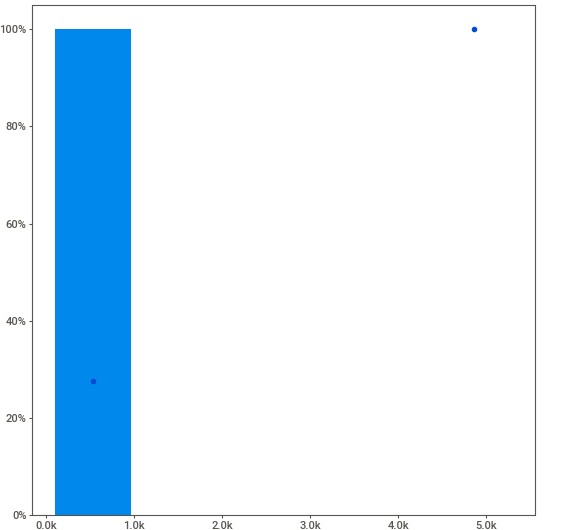
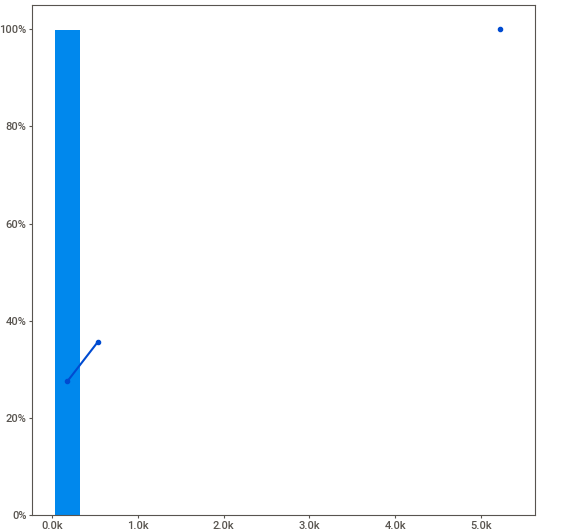
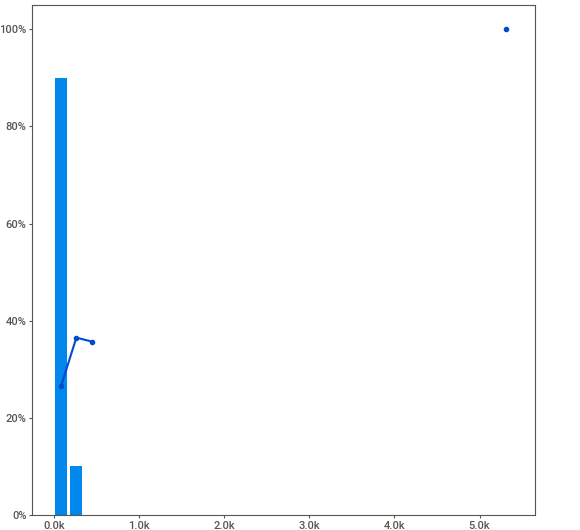
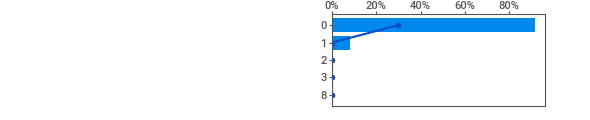
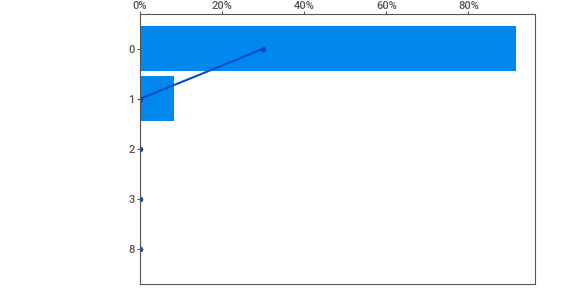
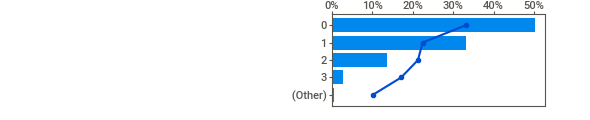
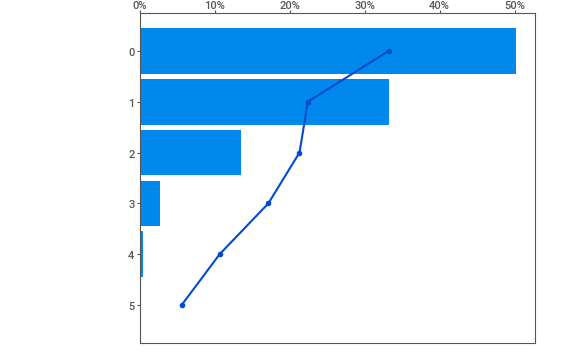
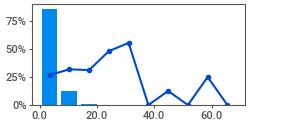
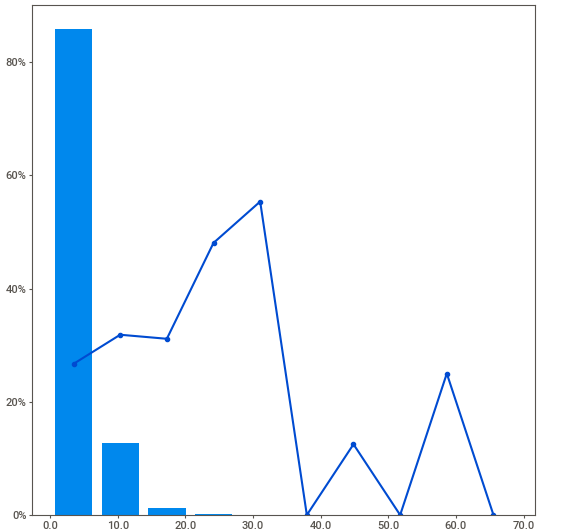
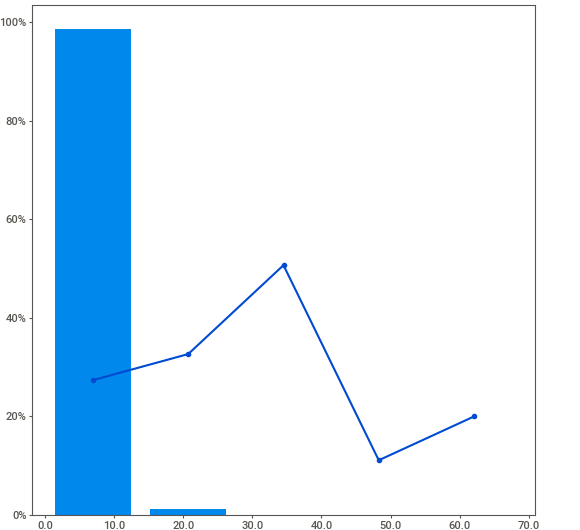
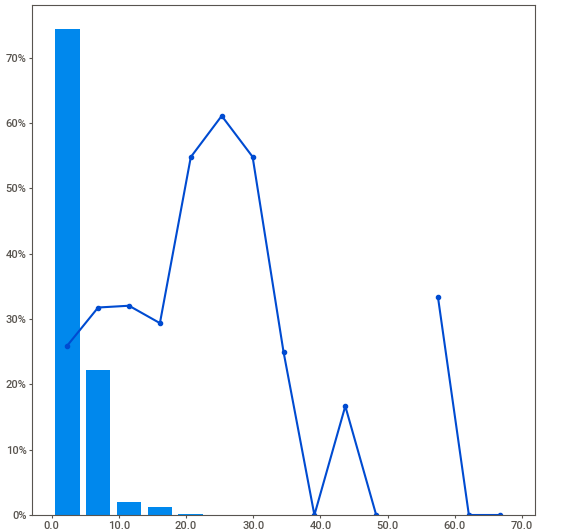
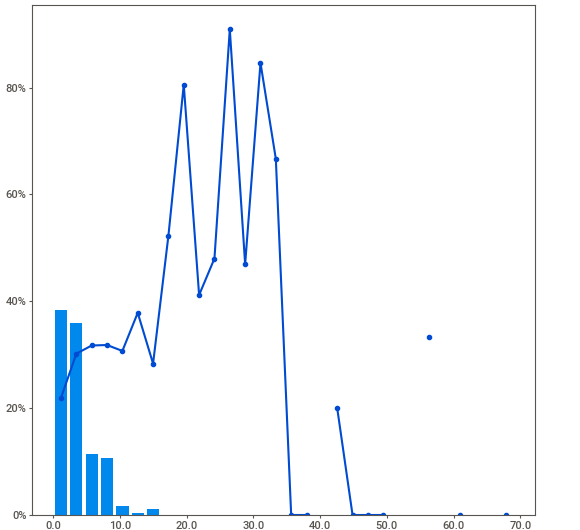
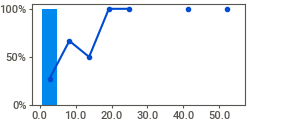
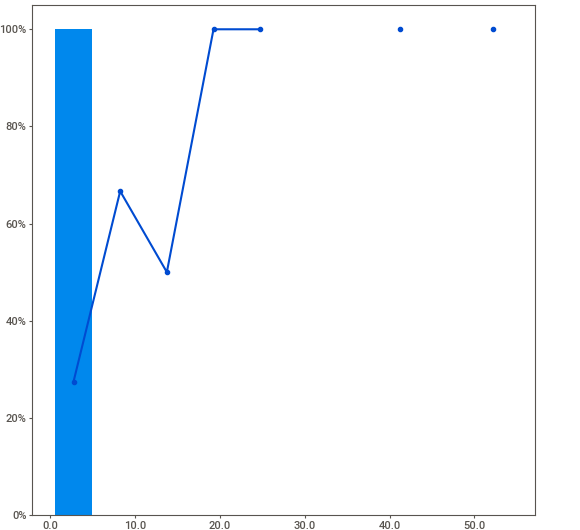
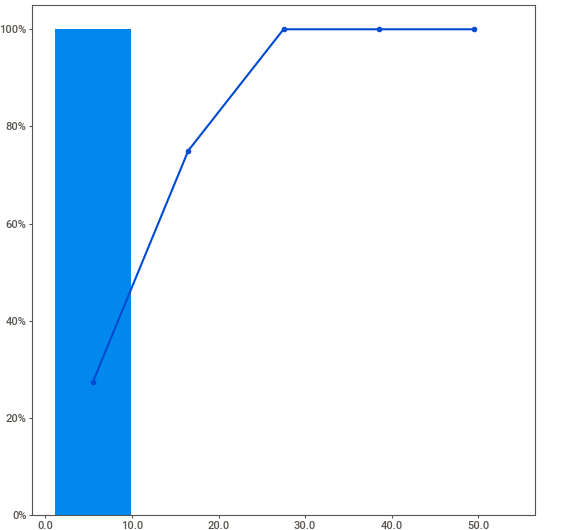
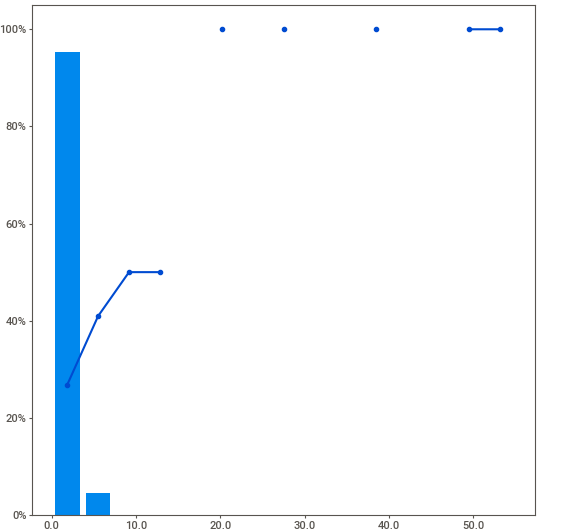
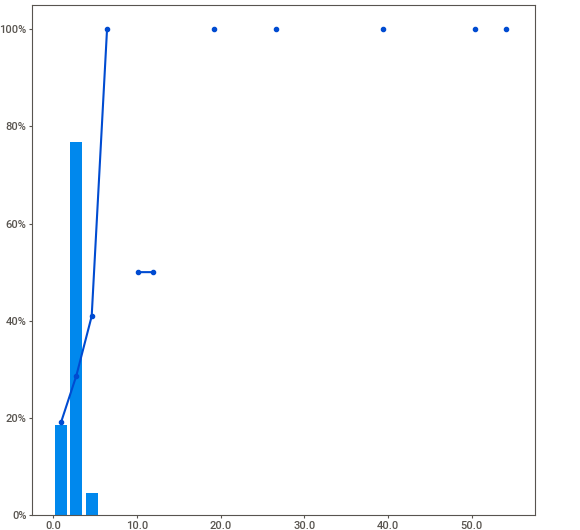
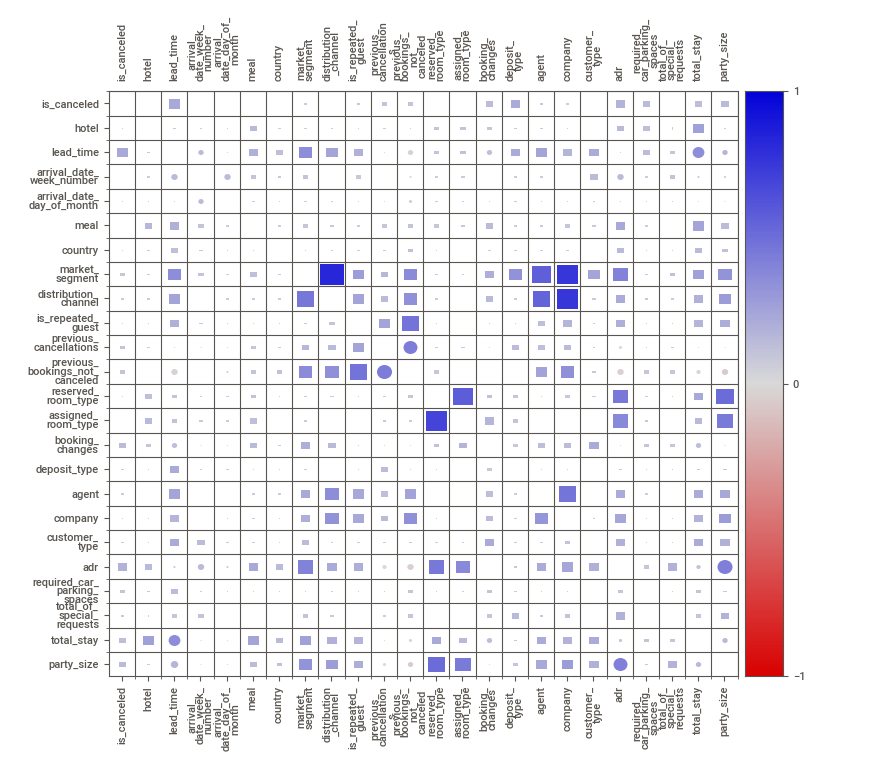
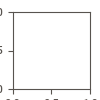

In [47]:
report.show_notebook()

In [48]:
dataset['is_canceled'] = dataset['is_canceled'].astype('object')

# Encoding and Feature Scaling


In [49]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [50]:
dataset

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,party_size
0,1,0,3.045867,0.011864,-1.676904,0,3,3,1,0,...,3.751357,0,1,1,2,-1.932995,-0.299202,-0.839740,-1.313817,-0.031855
1,1,0,7.636051,0.011864,-1.676904,0,3,3,1,0,...,5.126308,0,1,1,2,-1.932995,-0.299202,-0.839740,-1.313817,-0.031855
2,1,0,-0.847073,0.011864,-1.676904,0,3,3,1,0,...,-0.373498,0,1,1,2,-0.569729,-0.299202,-0.839740,-0.951965,-1.290773
3,1,0,-0.777349,0.011864,-1.676904,0,3,2,0,0,...,-0.373498,0,0,0,2,-0.569729,-0.299202,-0.839740,-0.951965,-1.290773
4,1,0,-0.765728,0.011864,-1.676904,0,3,6,3,0,...,-0.373498,0,0,1,2,-0.151661,-0.299202,0.362213,-0.590113,-0.031855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,0,0,-0.661142,0.596909,1.605467,0,3,5,3,0,...,-0.373498,0,0,1,2,-0.185470,-0.299202,-0.839740,1.219146,-0.031855
87375,0,0,0.256895,0.596909,1.718653,0,3,6,3,0,...,-0.373498,0,0,1,2,2.164619,-0.299202,1.564167,1.219146,1.227063
87376,0,0,-0.533314,0.596909,1.718653,0,3,6,3,0,...,-0.373498,0,0,1,2,0.933681,-0.299202,3.968075,1.219146,-0.031855
87377,0,0,0.338240,0.596909,1.718653,0,3,6,3,0,...,-0.373498,0,0,1,2,-0.035329,-0.299202,-0.839740,1.219146,-0.031855


# Splitting the data into Train and Test

In [51]:
from sklearn.model_selection import train_test_split

X = dataset.drop('is_canceled', axis = 1)
y = dataset['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Decision tree

In [53]:
#Applying the Decision Tree on the training dataset

from sklearn.tree import DecisionTreeClassifier
dtmodel_ini = DecisionTreeClassifier()
dtmodel_ini.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
#Running the model on the test dataset

y_pred_ini = dtmodel_ini.predict(X_test)

In [55]:
#Importing all the functions to for checking the accuracies

from sklearn.metrics import accuracy_score

In [56]:
#Using accuracy score we are checking the accuracy on the testing dataset

accuracy_score(y_test,y_pred_ini)

0.7500572213321126

In [58]:
#Storing the predicted values of training dataset in y_pred_train

y_pred_train = dtmodel_ini.predict(X_train)

In [59]:
#Checking the accuracy of training dataset 

accuracy_score(y_train,y_pred_train)

0.9950216728895755

In [60]:
#Checking the accuracy of testing dataset

accuracy_score(y_test,y_pred_ini)

0.7500572213321126

In [61]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel

from sklearn.model_selection import GridSearchCV

parameters = [ {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(estimator = dtmodel_ini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

In [62]:
best_parameters

{'max_depth': 10, 'min_samples_split': 20}

In [63]:
#Applying the Decision Tree on the training dataset

from sklearn.tree import DecisionTreeClassifier

dtmodel_tuned_pruned = DecisionTreeClassifier(max_depth=7,min_samples_split=50)
dtmodel_tuned_pruned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

In [64]:
#Running the model on the test dataset

y_pred_tuned_pruned = dtmodel_tuned_pruned.predict(X_test)

In [65]:
#Using accuracy score we are checking the accuracy on the testing dataset

accuracy_score(y_test,y_pred_tuned_pruned)

0.7969787136644542

In [66]:
#Running the model on the test dataset

y_pred = dtmodel_tuned_pruned.predict(X_train)

In [67]:
#Using accuracy score we are checking the accuracy on the testing dataset

accuracy_score(y_train,y_pred)

0.7973334477776347

# Random Forest

In [100]:
#import randomforestclassifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

#Classification report gives us the results of our model
from sklearn.metrics import classification_report

In [101]:
#load the classifier, n_jobs is the parameter to set how many jobs to run in parallel. -1 mean using just 1 processor
clf = RandomForestClassifier(n_jobs=-1)

#calling .fit() on the training data runs the model on the training data.
clf.fit(X_train,y_train.values.ravel())

# .predict() makes the prediction from the trained model
pred=clf.predict(X_test)

#prints "-" 50 times for visual effect 
print("-"*50)


print("Random forest classifier results")


#prints out classification report



print(classification_report(y_test.values,pred))

--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     12625
           1       0.73      0.57      0.64      4851

    accuracy                           0.82     17476
   macro avg       0.79      0.74      0.76     17476
weighted avg       0.81      0.82      0.81     17476



In [102]:
# class weights are added to our Random forest classifier by just adding a class_weight parameter
# in the function call, now class 1 will have 4 times more weightage than the 0 class hence
# 4 times more penalty for the model for bad classification of class 1.  Lets see if we do better than the earlier results

clf = RandomForestClassifier(n_jobs=-1, class_weight={0:1,1:4})

#fits the model with given class weight above.
clf.fit(X_train,y_train.values.ravel())

#makes a prediction
pred=clf.predict(X_test)

print("-"*50)

print("Random forest classifier results")

print(classification_report(y_test.values,pred))


--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     12625
           1       0.73      0.55      0.63      4851

    accuracy                           0.82     17476
   macro avg       0.79      0.74      0.75     17476
weighted avg       0.81      0.82      0.81     17476



In [104]:
rf = RandomForestClassifier(n_estimators=30, max_depth=3, oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, oob_score=True)

In [105]:
## Check out of Bag Score

rf.oob_score_

0.7292820050641603

In [106]:
## Inspect trees

rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=733834964),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=514463633),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=123504125),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1332560297),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=989374863),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=819665335),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=628446962),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2051745575),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1524597490),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=780492211),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=691066549),
 DecisionTre

In [109]:
# Set folds
k=5

# Define grid
parameters = {'n_estimators': [100, 500], 'max_depth': [3, 5]}

In [112]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf, parameters, cv = k, scoring = "roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=30,
                                              oob_score=True),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 500]},
             scoring='roc_auc')

In [113]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=500, oob_score=True)

In [114]:
# Train model on the full training set with best estimator
best_model = grid_search.best_estimator_

# Fit the model on training data
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, oob_score=True)

0.7495386464100253
Training Dataset Accuracy: 0.7495386464100253 , Test Dataset Accuracy: 0.7493705653467613
Training Dataset ROC AUC Score: 0.8112351610831223 , Test Dataset ROC AUC Score: 0.8118598063888021


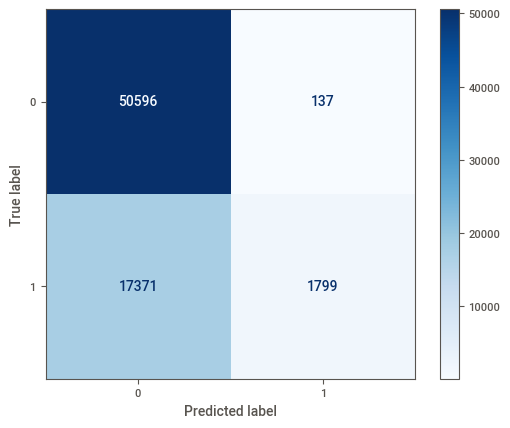

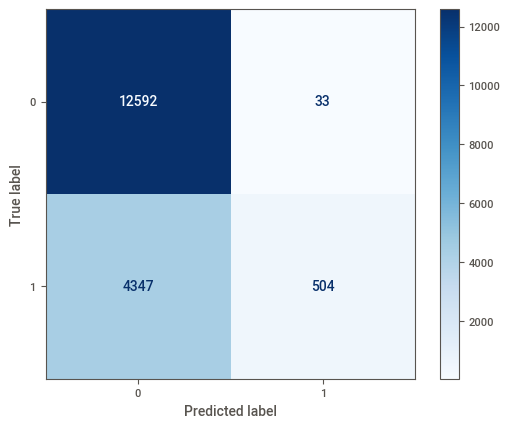

In [116]:
## Training data confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = best_model.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.plot(cmap = "Blues");

## Test data confusion matrix

y_pred = best_model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
plt.plot(cmap = "Blues");

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

accuracy = (TN + TP)/(TN + FP + FN + TP) 
print(accuracy)

# Model Performance (Accuracy) of the training data
accuracy_train = best_model.score(X_train, y_train)

# Model Performance (Accuracy) of the test data
accuracy_test = best_model.score(X_test, y_test)

print('Training Dataset Accuracy: ' + str(accuracy_train), ', Test Dataset Accuracy: ' + str(accuracy_test))

## Get the probability of predicting 1 on training data
y_pred = best_model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)

## Get the probability of predicting 1 on test data
y_pred = best_model.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, y_pred)

print('Training Dataset ROC AUC Score: ' + str(auc_train), ', Test Dataset ROC AUC Score: ' + str(auc_test))

In [118]:
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [124]:
# Train model using the best parameters (learned in previous exercise) - max_depth=5, n_estimators=100
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [125]:
## Get the probability of predicting 1 on training data
y_pred = rf_model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)

## Get the probability of predicting 1 on test data
y_pred = rf_model.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, y_pred)

print('Training Dataset ROC AUC Score: ' + str(auc_train), ', Test Dataset ROC AUC Score: ' + str(auc_test))

Training Dataset ROC AUC Score: 0.810588784074914 , Test Dataset ROC AUC Score: 0.8110527542550173


<BarContainer object of 23 artists>

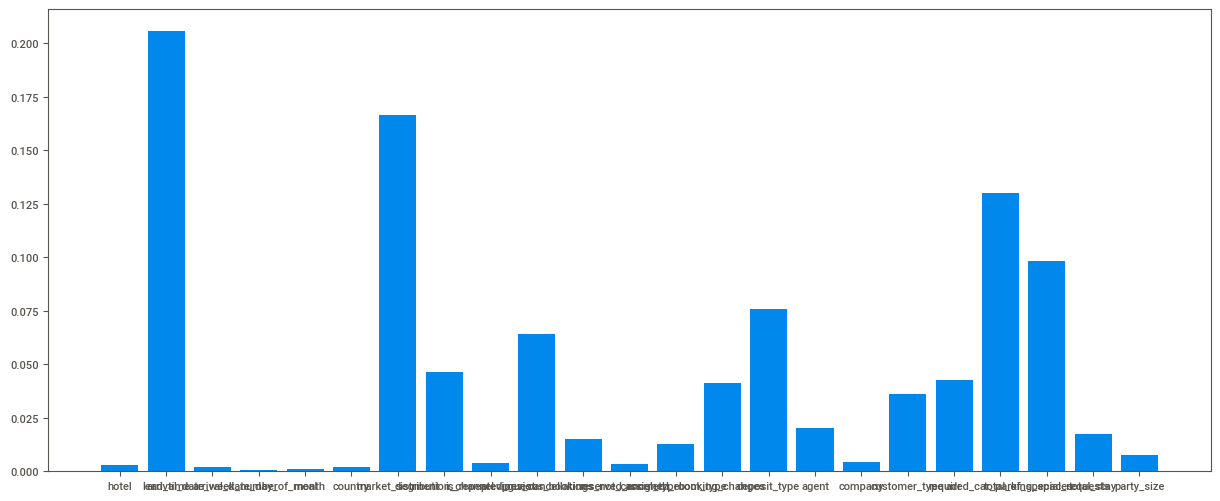

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
feature_importances = rf_model.feature_importances_
plt.bar(X_train.columns, feature_importances)

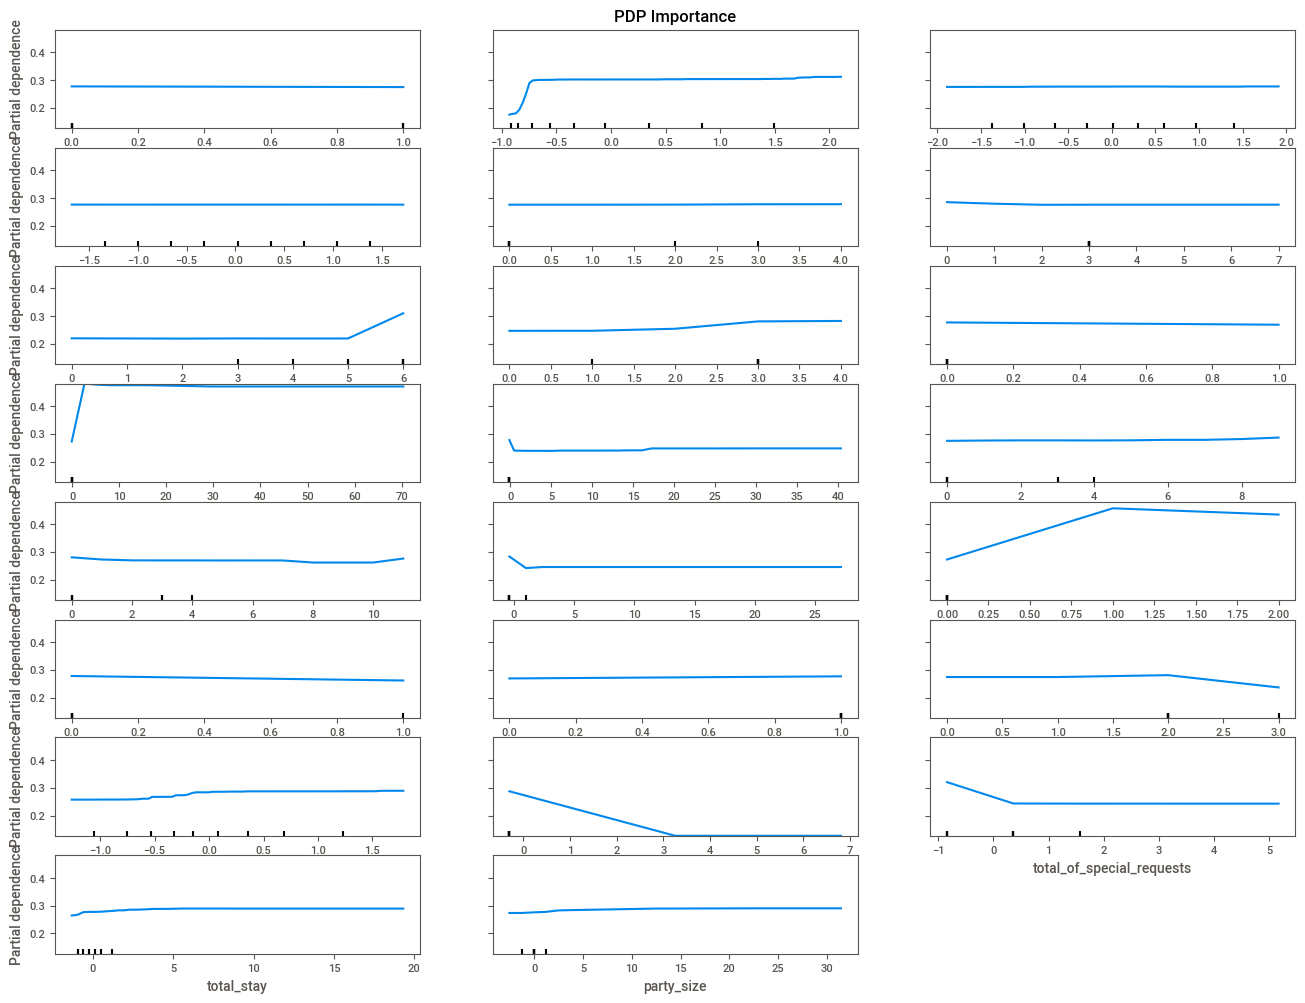

In [128]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_title("PDP Importance")
pdp_features = X_test.columns

PartialDependenceDisplay.from_estimator(rf_model, X_test, pdp_features, ax=ax);

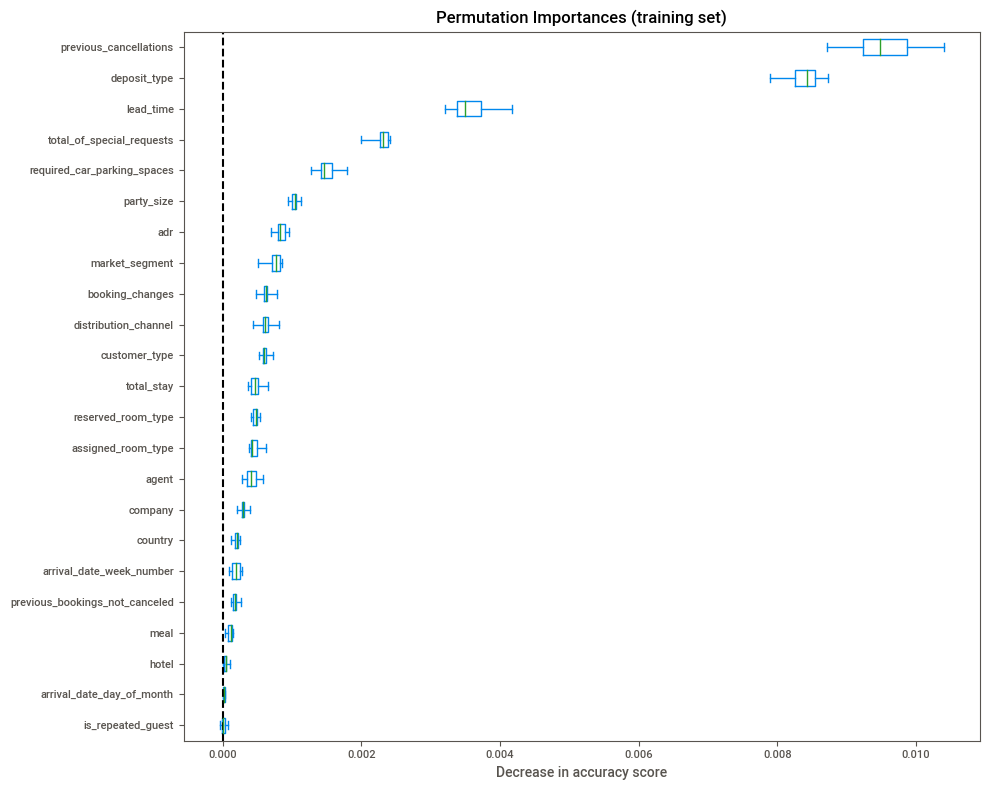

In [129]:
result = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10, figsize = (10,8))
ax.set_title("Permutation Importances (training set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# XGBoost

In [130]:
#import Scikit learn's Ada boosting classifier
from sklearn.ensemble import AdaBoostClassifier

#create the classifier object
clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)

In [131]:
#lets do the predictions
preds = clf.predict(X_test)

In [133]:
# lets create summary lists. We will use these lists at the end to summarise all the models
precisionList=[]
recallList=[]
accuracyList=[]
modelList=[]

In [134]:
# print accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("AdaBoost")

Accuracy: 0.8039597161821928


In [135]:
#import Scikit learn's Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#create the classifier object
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [136]:
#lets do the predictions
preds = clf.predict(X_test)

In [137]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("Gradient Boosting")

Accuracy: 0.8073929961089494


In [138]:
# import xgboost
import xgboost as xgb

# create an XG Boost classifier
xg_reg = xgb.XGBClassifier( n_estimators = 10)

In [139]:
# Fit and predict from the model
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [140]:
# print the accuracy

print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("XGBoost")

Accuracy: 0.8041313801785306


In [143]:
# We create a final list to collate all the results so far
finalList= [modelList, accuracyList]
# final dataframe to see all the results.
pd.DataFrame(finalList, index=['Model','Accuracy']).T

,Model,Accuracy
0,AdaBoost,0.80396
1,Gradient Boosting,0.807393
2,XGBoost,0.804131


In [145]:
status_enc = {
    'default': 0,
    'ok': 1
}

y_train_enc = y_train.map(status_enc)

print(y_train[:5], y_train_enc[:5])

22334    0
36921    0
62200    0
71823    0
37600    0
Name: is_canceled, dtype: int8 22334   NaN
36921   NaN
62200   NaN
71823   NaN
37600   NaN
Name: is_canceled, dtype: float64


In [150]:
train_dm = xgb.DMatrix(X_train, y_train, feature_names=list(X_train.columns))

In [151]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'silent': 1
}

In [152]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'auc'}, seed=123)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.798564,0.001134,0.796149,0.002175
1,0.808243,0.001995,0.805563,0.001325
2,0.812915,0.001102,0.809502,0.001734
3,0.820777,0.002962,0.816998,0.001701
4,0.825325,0.001446,0.821031,0.001507
...,...,...,...,...
495,0.977913,0.000450,0.857878,0.000949
496,0.977960,0.000470,0.857911,0.000945
497,0.978025,0.000486,0.857891,0.000957
498,0.978118,0.000486,0.857840,0.001009


In [153]:
np.max(cv_results['test-auc-mean'])

0.8619919596604889

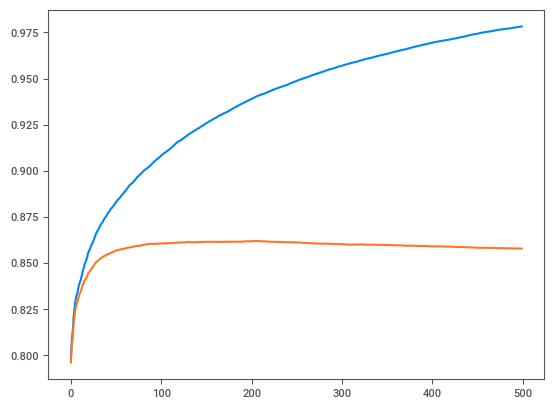

In [154]:
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [155]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'silent': 1
}

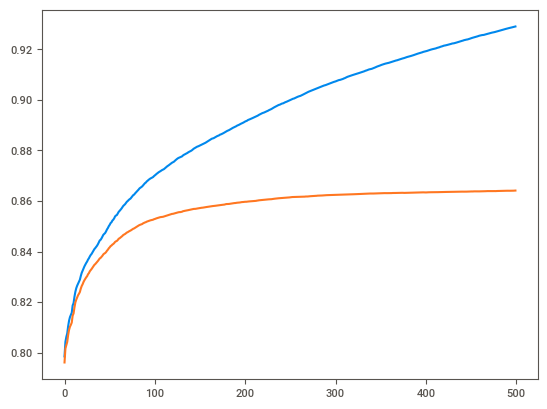

In [156]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

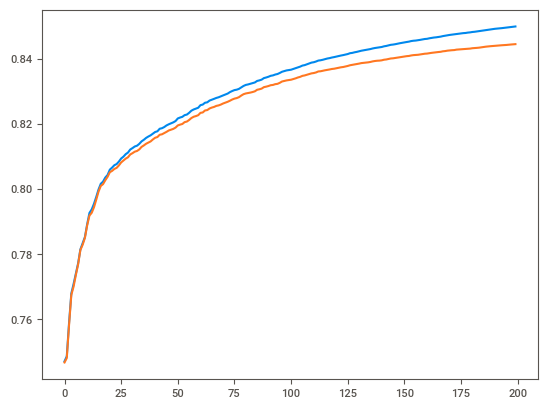

In [157]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'silent': 1
}

cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [158]:
np.max(cv_results['test-auc-mean'])

0.8444747005174035

In [159]:
watchlist = [(train_dm, 'train')]

In [160]:
xgb_model =  xgb.train(xgb_params, 
                 train_dm, 
                 num_boost_round = 100, 
                 evals = watchlist, 
                 verbose_eval = 10 )

[0]	train-auc:0.74722
[10]	train-auc:0.79087
[20]	train-auc:0.80601
[30]	train-auc:0.81307
[40]	train-auc:0.81725
[50]	train-auc:0.82316
[60]	train-auc:0.82676
[70]	train-auc:0.83071
[80]	train-auc:0.83270
[90]	train-auc:0.83500
[99]	train-auc:0.83681


In [161]:
y_test_enc = y_test.map(status_enc)
print(y_test[:5], y_test_enc[:5])

20465    0
28186    0
13682    0
71039    0
63288    0
Name: is_canceled, dtype: int8 20465   NaN
28186   NaN
13682   NaN
71039   NaN
63288   NaN
Name: is_canceled, dtype: float64


In [164]:
test_dm = xgb.DMatrix(X_test, y_test, feature_names=list(X_test.columns))

In [165]:
y_pred = xgb_model.predict(test_dm)
y_pred[:5]

array([0.14847617, 0.00298085, 0.05789768, 0.2735661 , 0.10951632],
      dtype=float32)

In [167]:
roc_auc_score(y_test, y_pred)

0.8389594714573498

## Feature importance

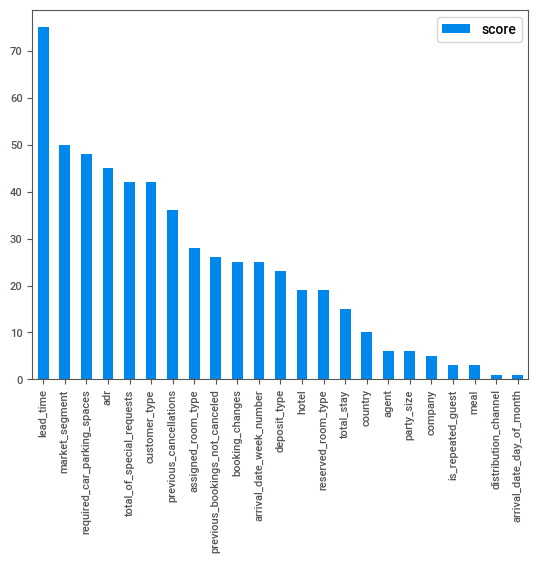

In [168]:
feature_importance = xgb_model.get_score(importance_type='weight')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

feature_importance_df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance_df.plot(kind = 'bar');

In [169]:
def partial_dependence_score(xgboost_model, X, y, col, values):
    results = []
    for value in values:
        X_copy = X.copy()
        X_copy[col] = value
        y_mean = np.mean(xgboost_model.predict(xgb.DMatrix(X_copy, y, feature_names=list(X_copy.columns))))
        results.append(y_mean)
    return np.array(results)

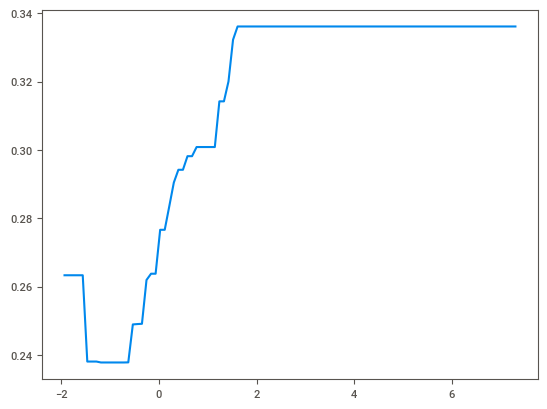

In [172]:
pdp_feature_name = 'adr'
pdp_feature = np.linspace(X_train[pdp_feature_name].min(), X_train[pdp_feature_name].max(), 100)

avg_pd = partial_dependence_score(xgb_model, X_train, y_train, pdp_feature_name, pdp_feature)

plt.plot(pdp_feature, avg_pd)
plt.show() 

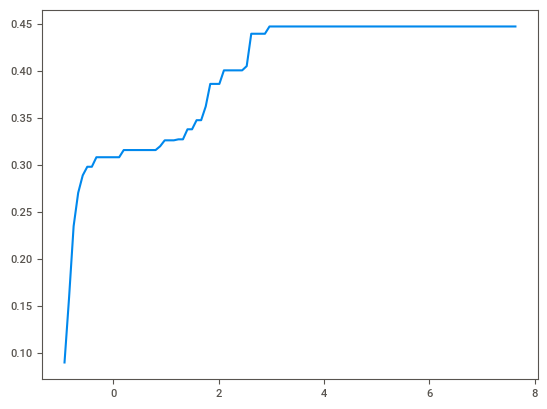

In [173]:
pdp_feature_name = 'lead_time'
pdp_feature = np.linspace(X_train[pdp_feature_name].min(), X_train[pdp_feature_name].max(), 100)

avg_pd = partial_dependence_score(xgb_model, X_train, y_train, pdp_feature_name, pdp_feature)

plt.plot(pdp_feature, avg_pd)
plt.show() 